# Bike Sharing

## Table of Content

### 🎧Data understanding
- Importing various libraries
- Read the data
- Analyze the shape
- Analyze the data type

### ✂Data Cleaning and Manipulation
- Check for null value
- Check for null percentage if required
- Deal with null values.----->Either drop the columns or impute the missing value.

### 🛒Structuring
- Check for number of unique value in each column
- Clubbing the columns in similar bucket depending on its nature
  - Categorical
  - Continuous 
  
### 🔧Data analysis
- Performed univariate and Bivariate analysis on variables.
- Pearson's Correlation Coefficent.

### ⚙ Preparing the data for Modelling
- Converting the non binary categorical variable to dummy variable
- Rescaling the variables


### Model Building
- RFE Method to select feature
- Dropping feature manually depanding on p-value and VIF,standard error

### Residual Analysis of Train data
- Checking for the validation of the assumption

### Predication and Evalution on Test data
- All preprocessing on the test data same as train data


## Reading the data

In [1]:
# Importing various libraries for Reading and Visualizating the data set

import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns

In [2]:
# Importing warning library to ignore the warnings

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# Reading the day csv

df=pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Analyzing the data shape

df.shape

(730, 16)

In [5]:
# Analyzing the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.cnt=df.cnt.astype(float)

In [7]:
# Getting the overview of the numeric variable and checking the sanity

df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

There seems to ne no NULL values in the data ,Just doing a Sanity Check

### Data Cleaning and Manipulation

In [8]:
# Sanity check for the Null Values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Drop the Redundant columns as of present Understanding

In [9]:
# "dteday" column also seems to be of no use as it's information is already been conveyed by other 
# columns such as yr,mnth,weekday ,So we will drop this column also

df.drop("dteday",axis=1,inplace=True)

#### "temp" and "atemp" columns seems to give same essence and both of themare as of now of not great importance so we will drop either of them so as of noe I will keep temp column

In [10]:
# Dropping the "atemp" column 

df.drop("atemp",axis=1,inplace=True)

#### As "cnt" is the target variable and it is the summation of the "casual" and "registered" column so keeping casual and registered isalso redundant for making the model,So we should drop these column

In [11]:
# Dropping "casual" and "registered" columns

df.drop(["casual","registered"],axis=1,inplace=True)

In [12]:
# Checking for the unique values in each column So that it can be easily structured

for i in df.columns:
    print(i,"->",df[i].nunique(),df[i].dtype)

instant -> 730 int64
season -> 4 int64
yr -> 2 int64
mnth -> 12 int64
holiday -> 2 int64
weekday -> 7 int64
workingday -> 2 int64
weathersit -> 3 int64
temp -> 498 float64
hum -> 594 float64
windspeed -> 649 float64
cnt -> 695 float64


## Structuring

In [13]:
# Clubing the columns into similar category bucket instant is not included as it will be dropped after a while 

categorical=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
continuous=["temp","hum","windspeed","cnt"]

### Univariate Analysis of Categorical Variable

season


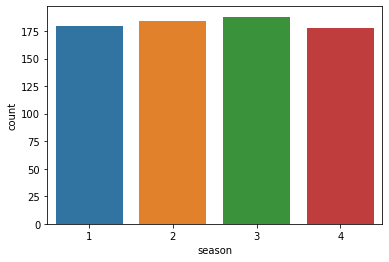

yr


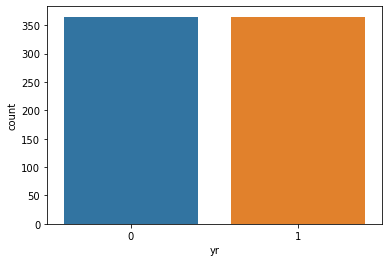

mnth


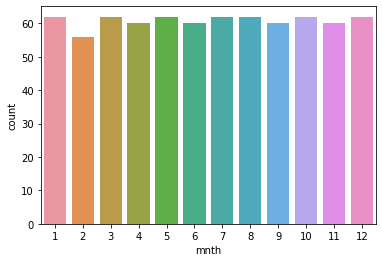

holiday


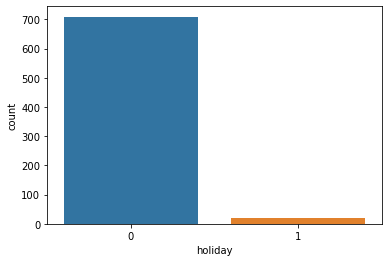

weekday


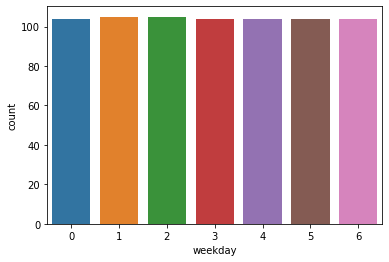

workingday


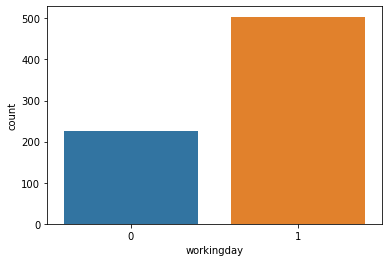

weathersit


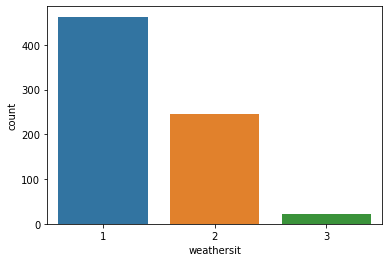

In [14]:
# Just getting an idea of the count of the each categorical variables

for i in categorical: # Automating the plot
    print(i)
    sns.countplot(df[i])
    plt.show()

#### Conclusion
- Demand seems to be mederately same in both the years
- Demand surges to zero during holiday which is obivous
- There seems to have no seasonal effect on demand
- Demand is 0 in Heavy Rain and very low in Light snow

### Bivariate Analysis of Categorical Vs "cnt" (Target Variable)

season Vs cnt


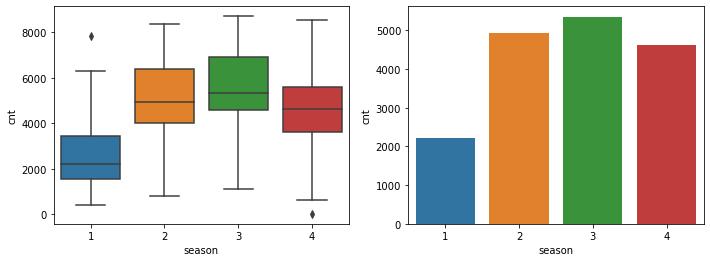

yr Vs cnt


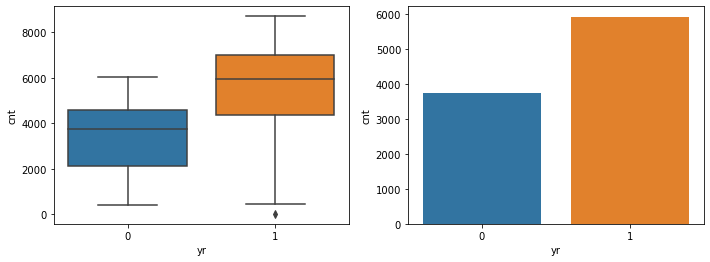

mnth Vs cnt


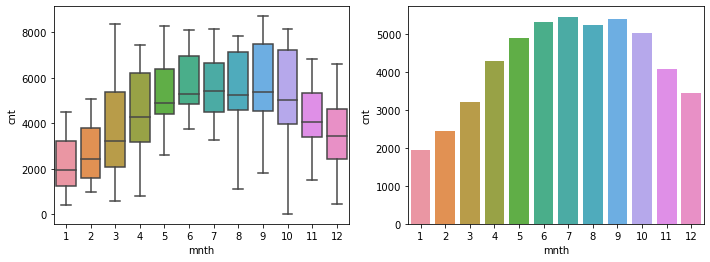

holiday Vs cnt


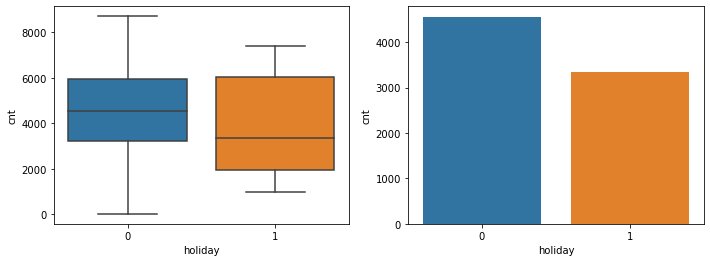

weekday Vs cnt


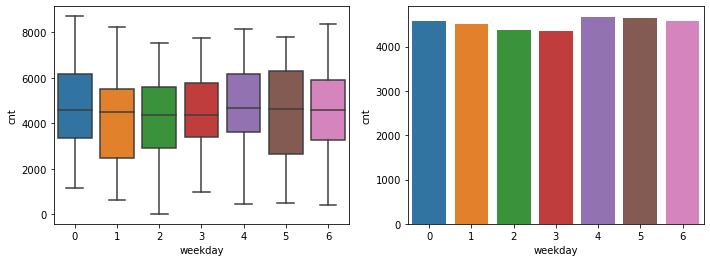

workingday Vs cnt


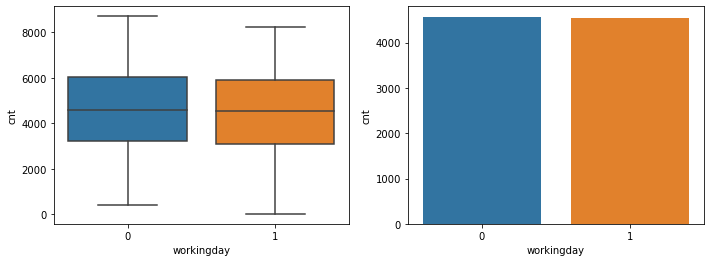

weathersit Vs cnt


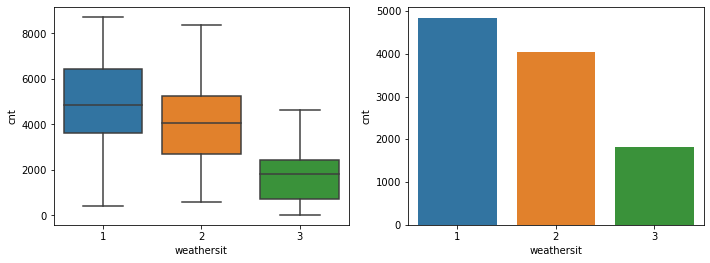

In [15]:
# Just getting an idea of the categorical variables Vs cnt

for i in categorical: # Automating categorical- cnt plot
        
        print(i,"Vs cnt")
        plt.figure(figsize=[18,4]) # Increasing the size of the plots
        
        plt.subplot(131)
        sns.boxplot(df[i],df.cnt)# Plot 1
        
        plt.subplot(132)
        sns.barplot(df[i],df.cnt,ci=None,estimator=np.median)# plot 2
        
        plt.show()

#### Conclusion
- The demand is high in season 3(Fall) and least in season 1(Spring)
- With year demand seems to increase
- Mid way between the year demand is on peak and then slowly decreases but at the end of the year demand are comparetively high   than the beginning of the year
- The demand decreases on the holiday
- There are no such week or workingday trends which can be concluded as of now
- The demands are highest on the 1(Clear day)and decreases with bad weather as can be seen for3(Light Snow)

## Univariate Analysis of Continuous Variable

### Outlier check

temp


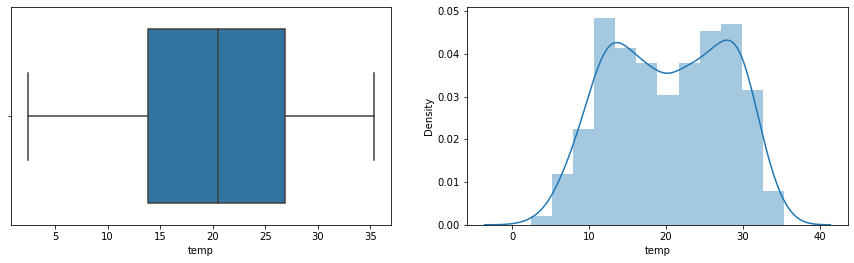

hum


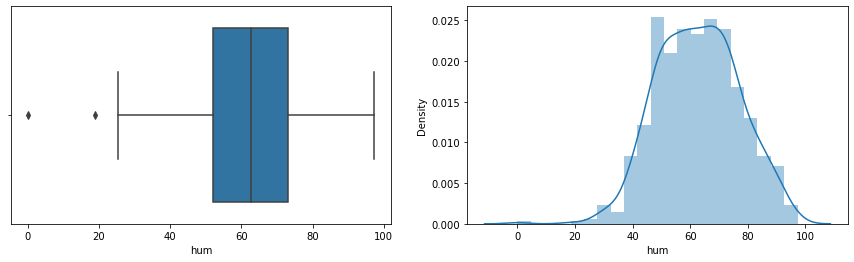

windspeed


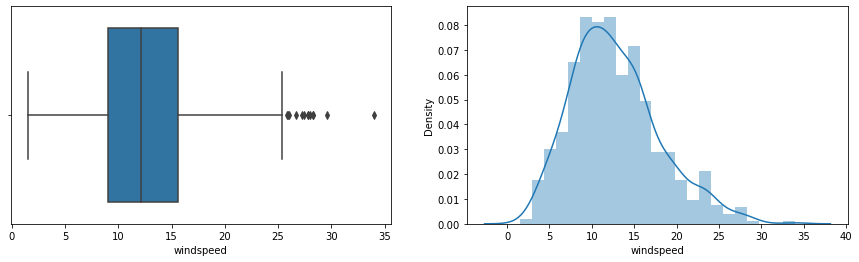

cnt


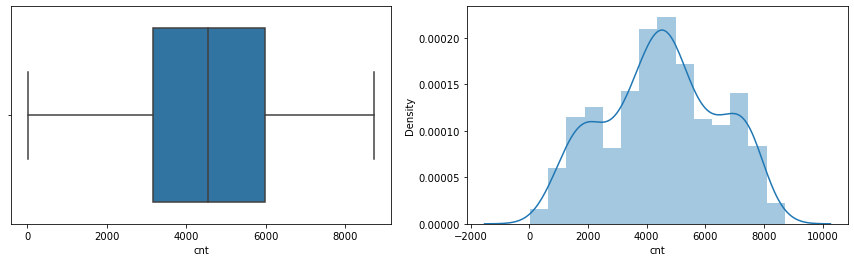

In [16]:
# Let's plot two types of plot for better understanding.
for i in continuous:
    print(i)
    plt.figure(figsize=[15,4]) #Increasing the size of the plots
    
    plt.subplot(121) # First plot code
    sns.boxplot(df[i])
    
    plt.subplot(122) # Second plot code
    sns.distplot(df[i])
    
    plt.show()

There seem to be few outliers in the "hum" and "windspeed". Let's check individually

### Outliers Treatment

In [17]:
# Capping and flooring the outliers so that justice can be done to the analysis.
for i in continuous:
    
    q1=np.percentile(df[i],25) # Finding the 25th percentile
    q3=np.percentile(df[i],75) # Finding the 75th percentile
    
    iqr=q3-q1 # Finding Inter Quatile Range
    
    uw=q3+1.5*iqr # Finding the upper whisker limit
    lw=q1-1.5*iqr # Finding the lower whisker limit
    
    df[i]=np.where(df[i]<lw,lw,df[i]) # replacing the lower boundary outliers with the lower whisker value
    df[i]=np.where(df[i]>uw,uw,df[i]) # replacing the upper boundary outliers with the upper whisker value

temp


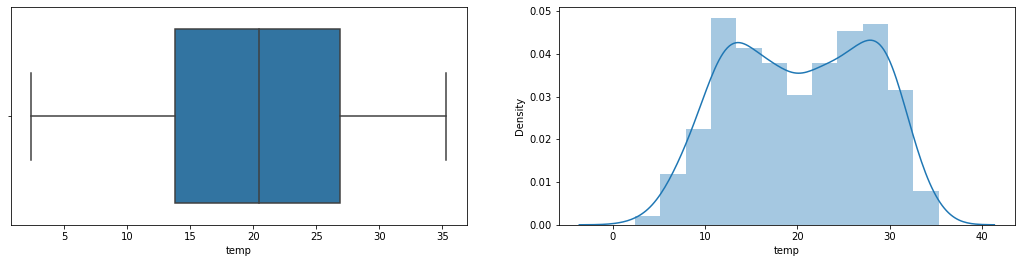

hum


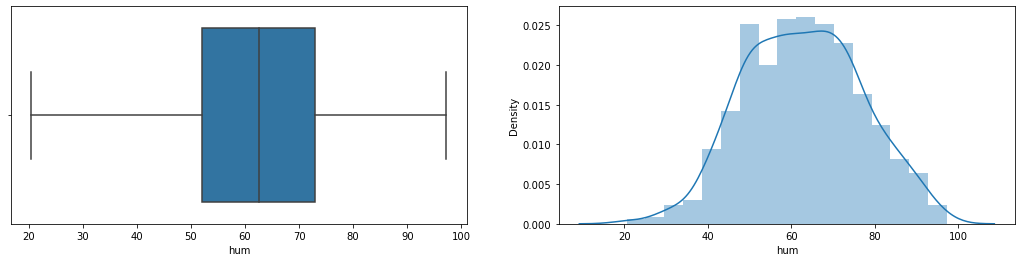

windspeed


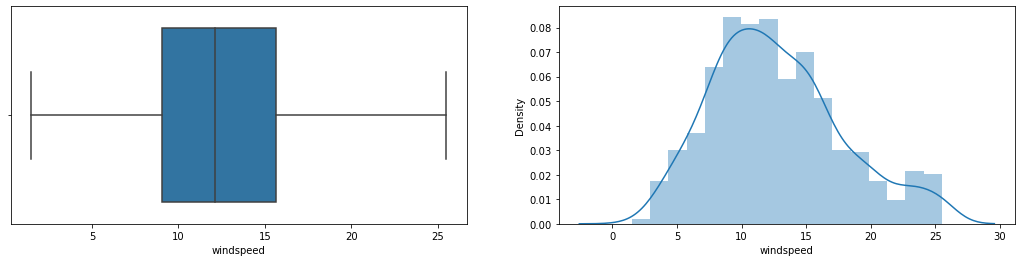

cnt


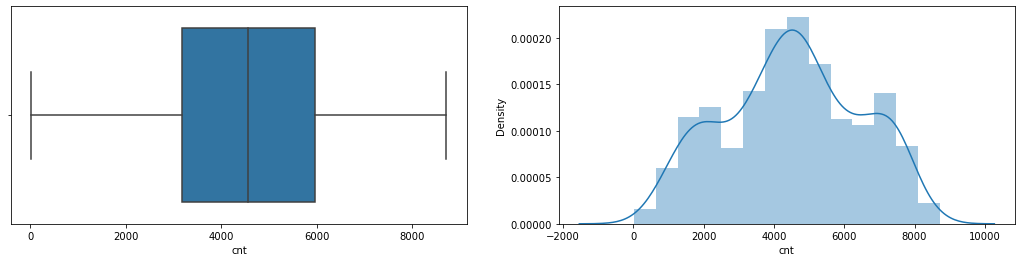

In [18]:
# Sanity Check for the outliers

for i in continuous:
    print(i)
    plt.figure(figsize=[18,4]) #Increasing the size of the plots
    
    plt.subplot(121) # First plot code
    sns.boxplot(df[i])
    
    plt.subplot(122) # Second plot code
    sns.distplot(df[i])
    
    plt.show()

## Bivariate Analysis of Continuous Variables

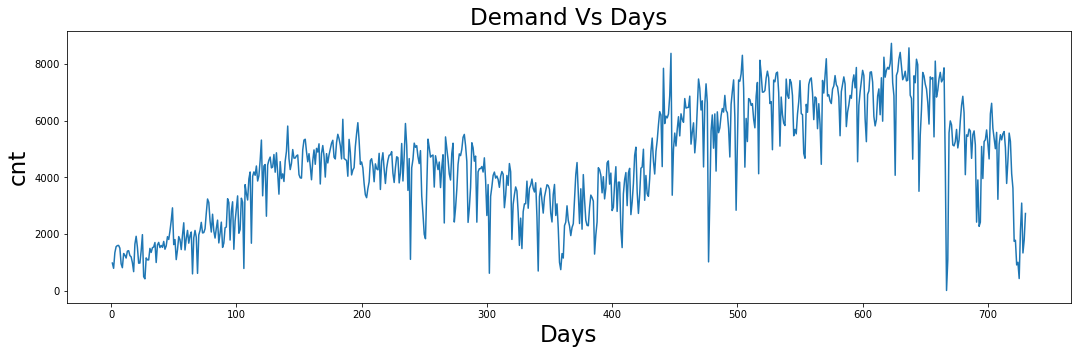

In [19]:
# Let's check the trend of demand with time

plt.figure(figsize=[18,5])
plt.plot(df.instant,df.cnt)
plt.xlabel("Days",fontsize=23)
plt.ylabel("cnt",fontsize=23)
plt.title("Demand Vs Days",fontsize=23)
plt.show()

#### Conclusion
- The demands are on rise with few fluctuation but at the end of 2019 it suddenly dropped and may be because of the pandemic

In [20]:
# "instant" columns is of no use in model building  as it is just acting as an index column,so it's better to drop from the
# further analysis.

df.drop("instant",axis=1,inplace=True)

## Linearity check 

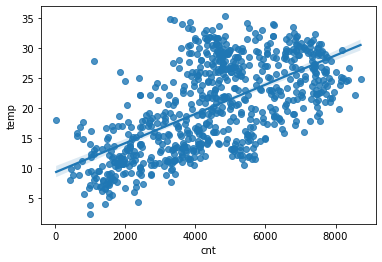

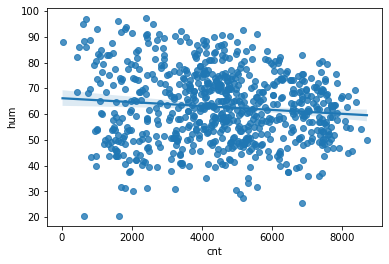

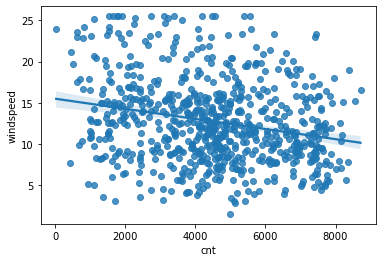

In [21]:
# Let's  plot two continuous variables.

 # Automating all the continuous variables pair scatterplot
for j in continuous:
    i="cnt"
    if i!=j: # Condition to avoid same variable on x and y axis
            
        sns.regplot(df[i],df[j])
        plt.show()

#### Conclusion
- There seems to be some sort of positive relation between "cnt" and "temp" i.e, with increase in the temperature demand seems to rise.
- Even though with hum and windspeed the scatterplot is largely distributed but we can see from the regplot that they have negative relation with the cnt.

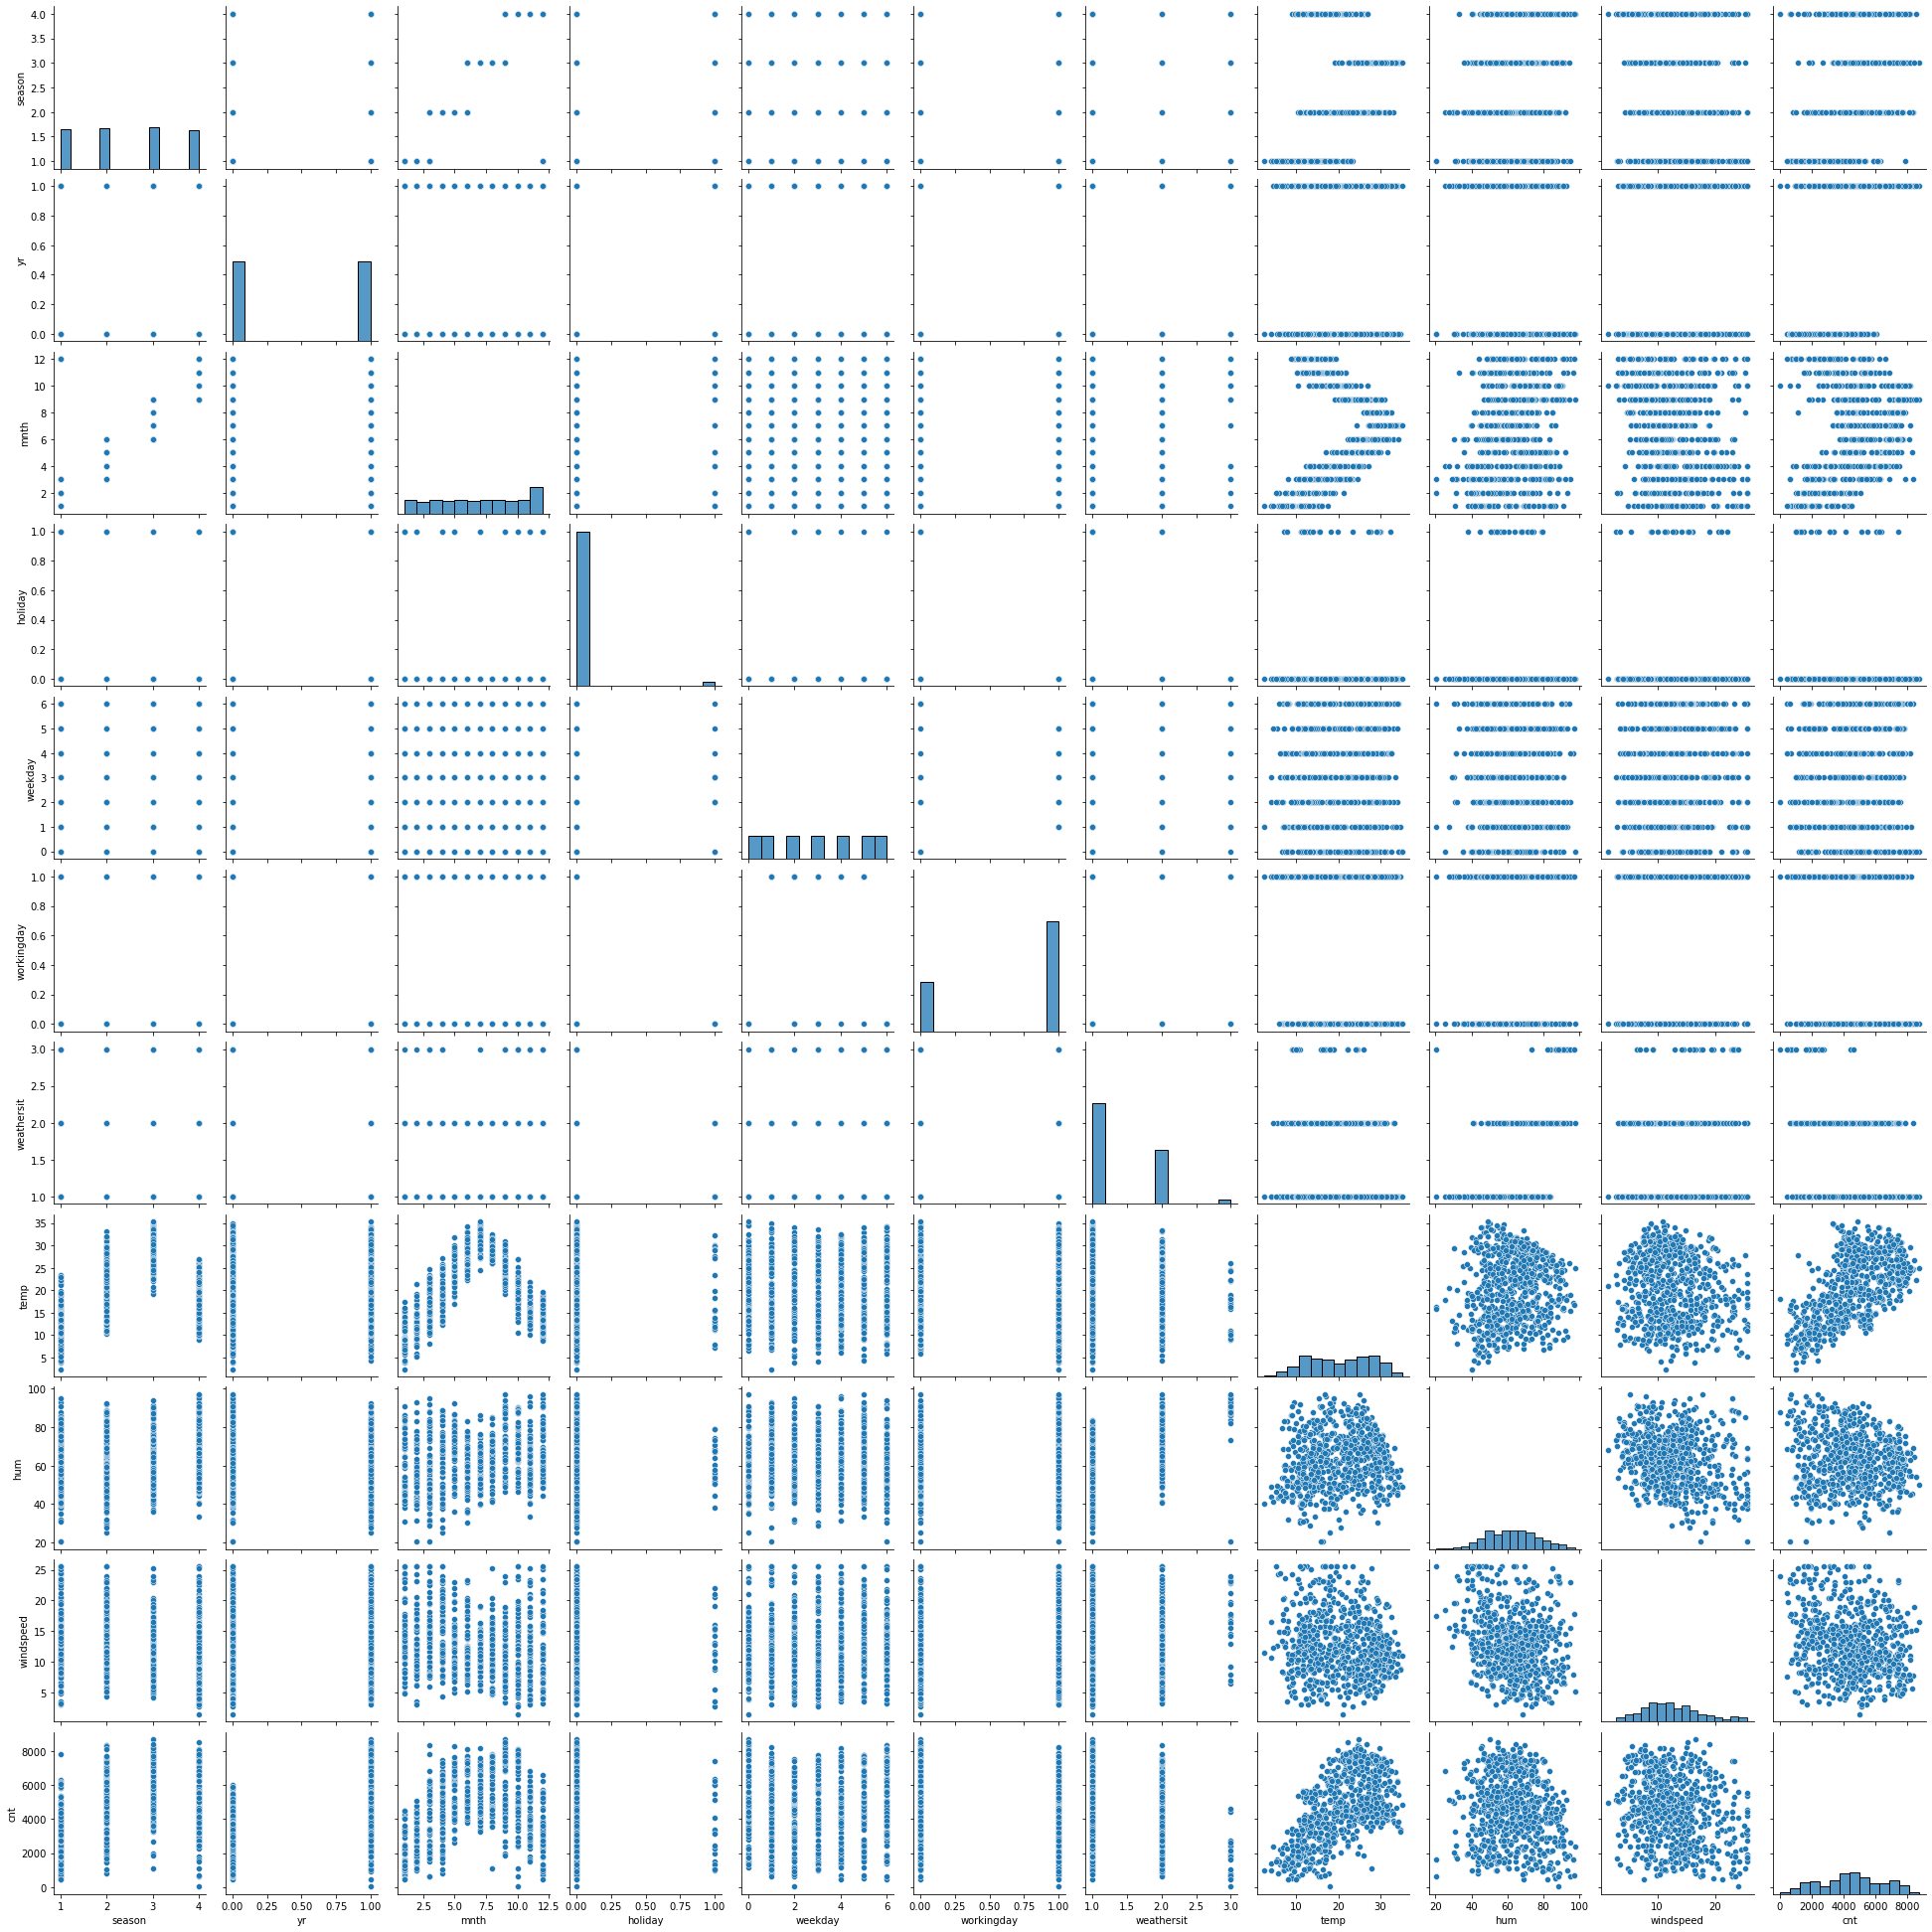

In [22]:
# Taking a brief review about the pattern of different features to get an idea

sns.pairplot(df)
plt.show()

### Multivariate Analysis

temp Vs hum


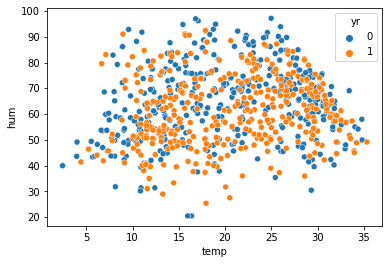

temp Vs windspeed


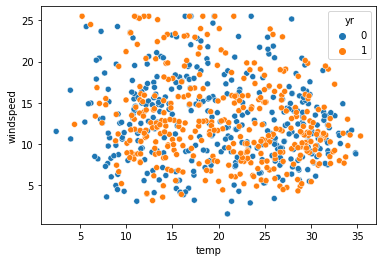

temp Vs cnt


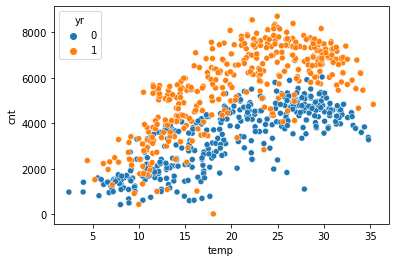

hum Vs temp


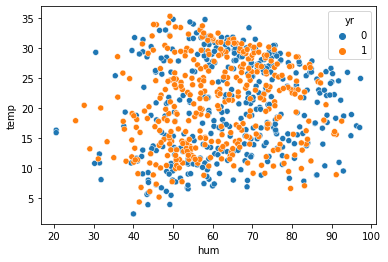

hum Vs windspeed


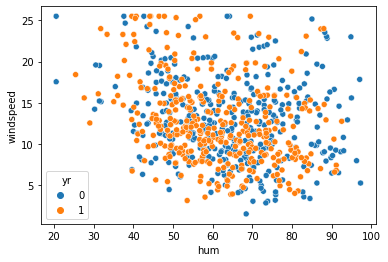

hum Vs cnt


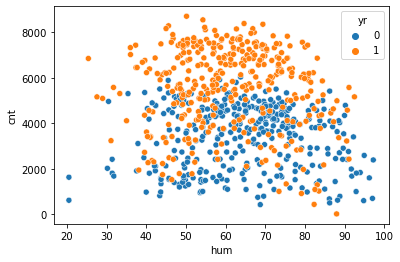

windspeed Vs temp


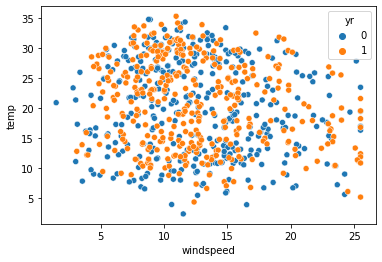

windspeed Vs hum


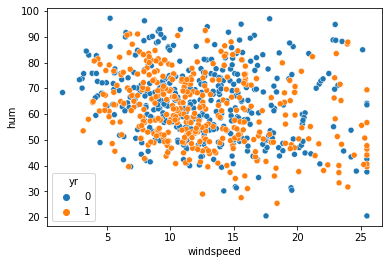

windspeed Vs cnt


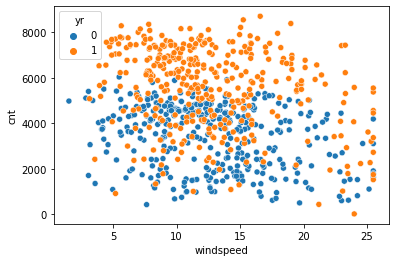

cnt Vs temp


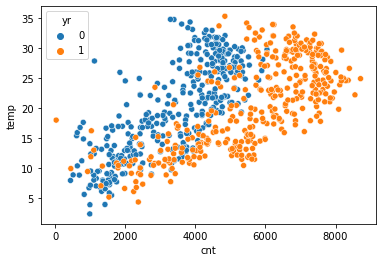

cnt Vs hum


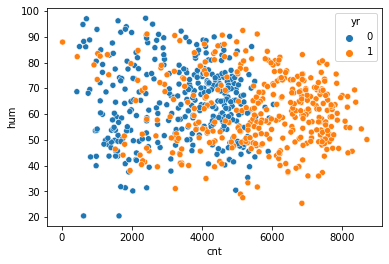

cnt Vs windspeed


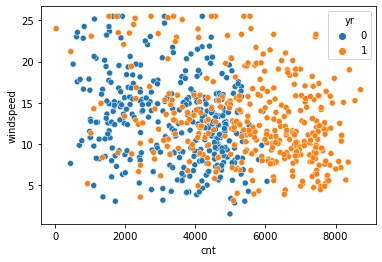

In [23]:
for i in continuous:     # Automating the plot
    for j in continuous:
        if i!=j:         # Condition to avoid same variable  on both x and y axis
            
            print(i,"Vs",j)
            sns.scatterplot(df[i],df[j],hue=df.yr)
            
            plt.show()

#### Conclusion
- The demands for the bike have increased in 2019 than 2018

#### Trying to analyze the different aspect

temp Vs hum


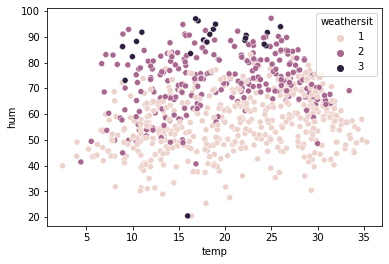

temp Vs windspeed


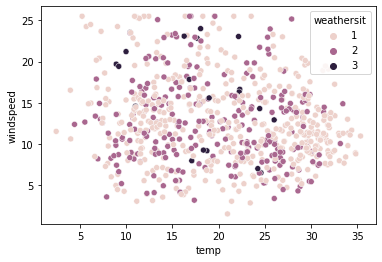

temp Vs cnt


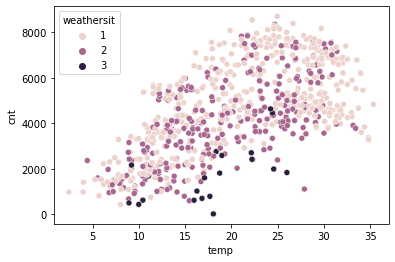

hum Vs temp


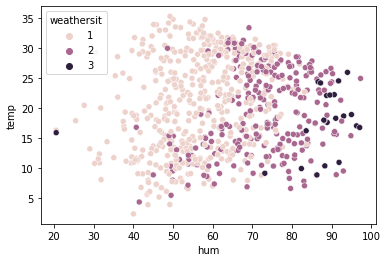

hum Vs windspeed


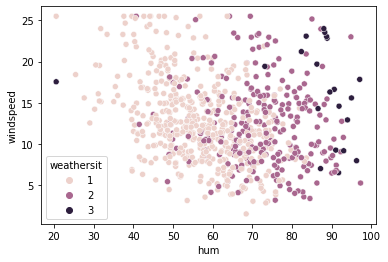

hum Vs cnt


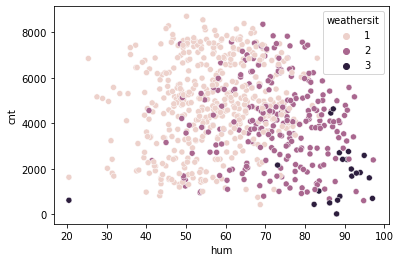

windspeed Vs temp


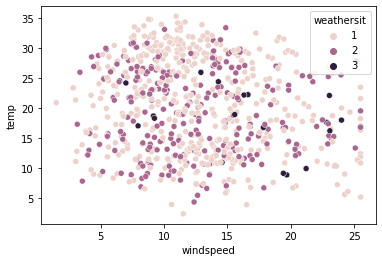

windspeed Vs hum


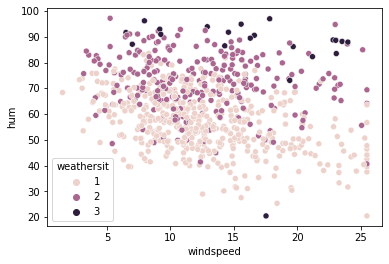

windspeed Vs cnt


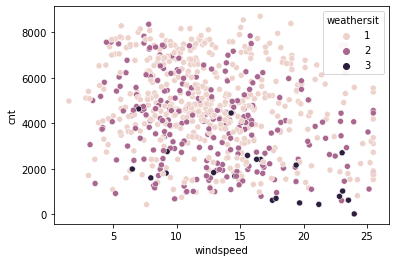

cnt Vs temp


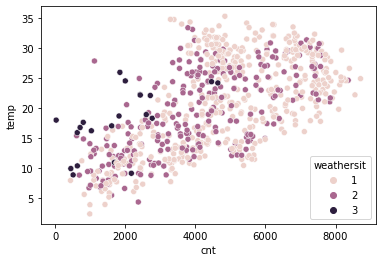

cnt Vs hum


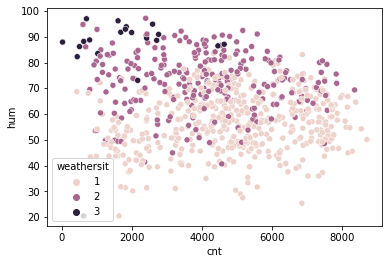

cnt Vs windspeed


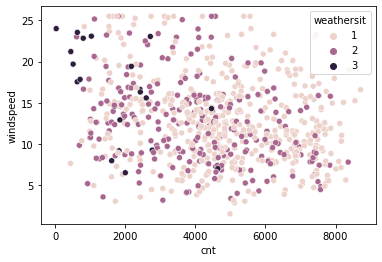

In [24]:
for i in continuous:      # Automating the plot
    for j in continuous:
        if i!=j:          # Condition to avoid same variable  on both x and y axis
            
            print(i,"Vs",j)
            sns.scatterplot(df[i],df[j],hue=df.weathersit)
            
            plt.show()

temp Vs hum


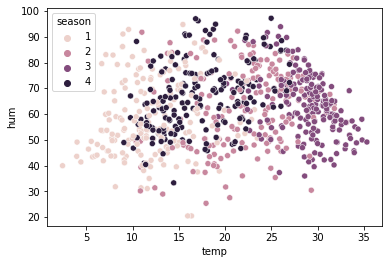

temp Vs windspeed


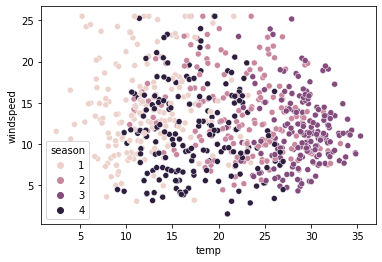

temp Vs cnt


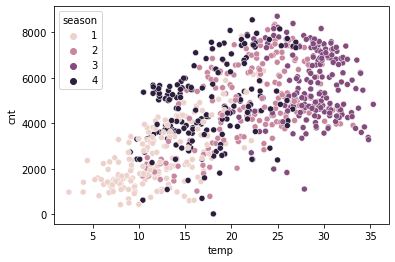

hum Vs temp


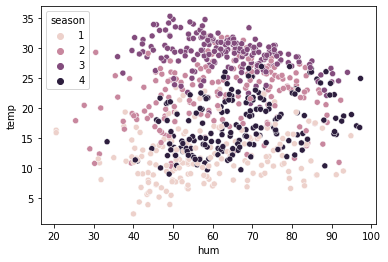

hum Vs windspeed


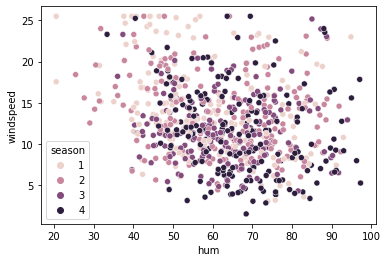

hum Vs cnt


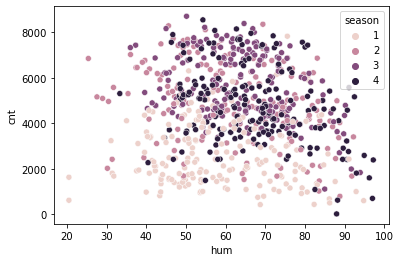

windspeed Vs temp


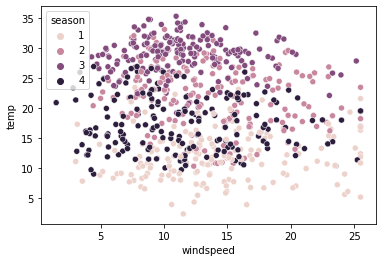

windspeed Vs hum


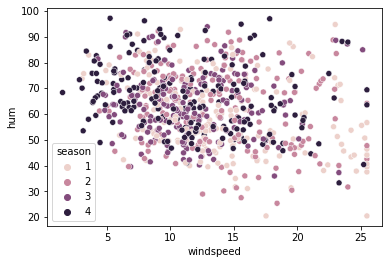

windspeed Vs cnt


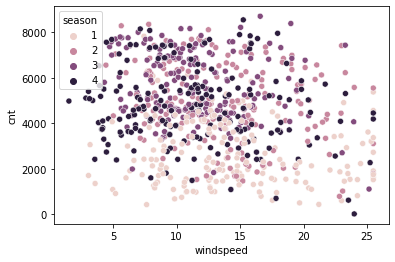

cnt Vs temp


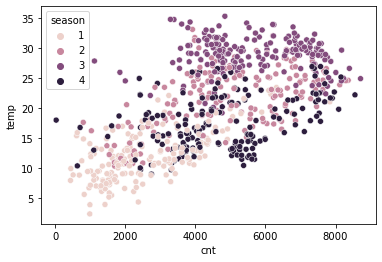

cnt Vs hum


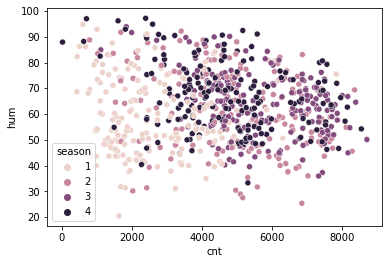

cnt Vs windspeed


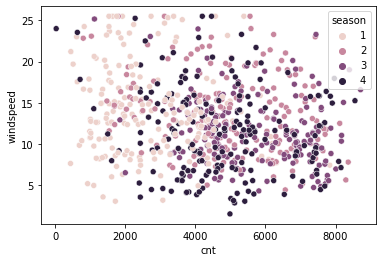

In [25]:
for i in continuous:
    for j in continuous:
        if i!=j: # Condition to avoid same variable on both x and y axis
            
            print(i,"Vs",j)
            sns.scatterplot(df[i],df[j],hue=df.season)
            
            plt.show()

## Data Preparation

In [26]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

       hum  windspeed     cnt  
0  80.5833  10.749882   985.0  
1  69.6087  16.652113   801.0  
2  43.7273  16.636703  1349.0  
3  59.0435  10.739832  1562.0  
4  43.6957  12.522300  1600.0

## Dummy Variable

#### Season column seems to be bit tedious to grab season information numerically so it's wiser to use Dummy variable to grab information efficiently as it has 4 categorical value

In [27]:
# Firstly we will convert numeric value of "season" to their respective meaning(name)

df.season.replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)

In [28]:
# Sanity check

df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

Now we will make dummy variable for this "season" column

In [29]:
season_name=pd.get_dummies(df.season)
season_name.head()

Fall  Spring  Summer  Winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

In [30]:
# Let's drop the first column from the season_name

season_name=pd.get_dummies(df.season,drop_first=True)
season_name.head()

Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [31]:
# Adding this result with the original data set (df)

df=pd.concat([df,season_name],axis=1)
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  Spring   0     1        0        1           1           2  14.110847   
1  Spring   0     1        0        2           1           2  14.902598   
2  Spring   0     1        0        3           1           1   8.050924   
3  Spring   0     1        0        4           1           1   8.200000   
4  Spring   0     1        0        5           1           1   9.305237   

       hum  windspeed     cnt  Spring  Summer  Winter  
0  80.5833  10.749882   985.0       1       0       0  
1  69.6087  16.652113   801.0       1       0       0  
2  43.7273  16.636703  1349.0       1       0       0  
3  59.0435  10.739832  1562.0       1       0       0  
4  43.6957  12.522300  1600.0       1       0       0

In [32]:
# Dropping the season column as its has now does not serve any value as dummy has already been created

df.drop("season",axis=1,inplace=True)


#### Let's Create dummy variable for "weekday" also as it is non binary categorical variable but before that let's replace numeric variable with the corresponding week days to get better feel of the column name of the dummy variable

In [33]:
# Replacing the weekday with their respective name

df.weekday.replace({1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat",0:"Sun"},inplace=True)

# Creating the dummy Variable
week_name = pd.get_dummies(df.weekday)

# Dropping the first column

week_name = pd.get_dummies(df.weekday,drop_first= True)

# Adding dummy variable to the original data set

df = pd.concat([df , week_name] , axis = 1)

# Dropping the weekday column as it is of no importance

df.drop(["weekday"],axis = 1,inplace=True)

In [34]:
# Replacing the numeric month value with their name

df.mnth.replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

# Creating the dummy Variable
month_name = pd.get_dummies(df.mnth)

# Dropping the first column

month_name = pd.get_dummies(df.mnth,drop_first= True)

# Adding dummy variable to the original data set

df = pd.concat([df , month_name] , axis = 1)

# Dropping the mnth column as it is of no importance

df.drop(["mnth"],axis = 1,inplace=True)

In [35]:
# Replacing the weathersit numerical value to their respective name

df.weathersit.replace({1:"Clear",2:"Mist",3:"Light_Snow",4:"Heavy_Rain"},inplace=True)

# Creating the dummy Variable
weather_name = pd.get_dummies(df.weathersit)

# Dropping the first column

weather_name = pd.get_dummies(df.weathersit)

# Adding dummy variable to the original data set

df = pd.concat([df , weather_name] , axis = 1)

# Dropping the weekday column as it is of no importance

df.drop(["weathersit"],axis = 1,inplace=True)

In [36]:
weather_name.head()

Clear  Light_Snow  Mist
0      0           0     1
1      0           0     1
2      1           0     0
3      1           0     0
4      1           0     0

In [37]:
# Just Sanity check

df.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   62.795640   12.720661   
std      0.500343    0.167266    0.462641    7.506729   14.126173    5.071566   
min      0.000000    0.000000    0.000000    2.424346   20.515637    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   25.501498   

               cnt      Spring      Summer      Winter  ...         Jul  \
count   730.000000  730.000000  730.000000  730.000000  ...  730.000000   
mean   4508.006849    0.246575    0.252055    0.243836  ...    0.084932   
std    1936.011647    0.431313    0.434490    0.429689  ...    0.278971   
min      22.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3169.750000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4548.500000    0.000000    0.000000    0.000000  ...    0.000000   
75%    5966.000000    0.000000    1.000000    0.000000  ...    0.000000   
max    8714.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.082192    0.084932    0.084932    0.082192    0.084932    0.082192   
std      0.274845    0.278971    0.278971    0.274845    0.278971    0.274845   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            Clear  Light_Snow        Mist  
count  730.000000  730.000000  730.000000  
mean     0.634247    0.028767    0.336986  
std      0.481971    0.167266    0.473004  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000  
75%      1.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

## Splitting the Data into Train and Test sets

In [38]:
# Importing the Sklearn library to split the data set into train and test

import sklearn
from sklearn.model_selection import train_test_split

In [39]:
# random.seed is used in order to have the same random data in test and train set

np.random.seed(99)

# Spliting the data in 7:3 ratio

df_train,df_test = train_test_split(df,train_size=0.7,random_state=99)

In [40]:
# Sanity Check

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [41]:
# Checking the columns presence

df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Clear', 'Light_Snow', 'Mist'],
      dtype='object')

In [42]:
#Sanity check,mathematically

df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.492157    0.027451    0.694118   20.437866   62.515638   12.410307   
std      0.500429    0.163554    0.461233    7.493211   13.759303    5.158172   
min      0.000000    0.000000    0.000000    2.424346   20.515637    1.500244   
25%      0.000000    0.000000    0.000000   14.008347   52.458300    8.791807   
50%      0.000000    0.000000    1.000000   20.431653   62.020850   11.583764   
75%      1.000000    0.000000    1.000000   26.923347   72.291700   15.448173   
max      1.000000    1.000000    1.000000   35.328347   97.250000   25.501498   

               cnt      Spring      Summer      Winter  ...         Jul  \
count   510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean   4539.829412    0.245098    0.241176    0.250980  ...    0.086275   
std    1921.445040    0.430568    0.428217    0.434003  ...    0.281045   
min     506.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3129.750000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4543.500000    0.000000    0.000000    0.000000  ...    0.000000   
75%    6038.500000    0.000000    0.000000    0.750000  ...    0.000000   
max    8555.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.090196    0.074510    0.090196    0.082353    0.078431   
std      0.281045    0.286744    0.262857    0.286744    0.275172    0.269113   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            Clear  Light_Snow        Mist  
count  510.000000  510.000000  510.000000  
mean     0.656863    0.027451    0.315686  
std      0.475223    0.163554    0.465245  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000  
75%      1.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

### Rescaling the Features

In [43]:
# Let's Create the list of features which require rescaling

var=["temp","hum","windspeed","cnt"]

In [44]:
# Importing the class MinMaxScaler from sklearn for Scaling

from sklearn.preprocessing import MinMaxScaler

In [45]:
# Initating the object
scaler = MinMaxScaler()

# Fit the data

df_train[var] = scaler.fit_transform(df_train[var])
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  Spring  \
373   1        0           1  0.205644  0.647051   0.213575  0.232327       1   
673   1        0           1  0.324018  0.376638   0.597199  0.590508       0   
206   0        0           1  0.887856  0.437453   0.496517  0.507392       0   
103   0        0           0  0.508849  0.436911   0.246514  0.343024       0   
329   0        0           1  0.394627  0.620987   0.128491  0.318300       0   

     Summer  Winter  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  Clear  \
373       0       0  ...    0    0    0    0    0    0    0      0   
673       0       1  ...    0    0    0    0    1    0    0      1   
206       0       0  ...    1    0    0    0    0    0    0      1   
103       1       0  ...    0    0    0    0    0    0    0      1   
329       0       1  ...    0    0    0    0    1    0    0      1   

     Light_Snow  Mist  
373           0     1  
673           0     0  
206           0     0  
103           0     0  
329           0     0  

[5 rows x 30 columns]

In [46]:
# Sanity check for the right scaling

df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.492157    0.027451    0.694118    0.547457    0.547343    0.454562   
std      0.500429    0.163554    0.461233    0.227729    0.179311    0.214913   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.352054    0.416276    0.303799   
50%      0.000000    0.000000    1.000000    0.547268    0.540895    0.420125   
75%      1.000000    0.000000    1.000000    0.744560    0.674744    0.581133   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      Spring      Summer      Winter  ...         Jul  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.501159    0.245098    0.241176    0.250980  ...    0.086275   
std      0.238718    0.430568    0.428217    0.434003  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.325972    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.501615    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.687352    0.000000    0.000000    0.750000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.090196    0.074510    0.090196    0.082353    0.078431   
std      0.281045    0.286744    0.262857    0.286744    0.275172    0.269113   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            Clear  Light_Snow        Mist  
count  510.000000  510.000000  510.000000  
mean     0.656863    0.027451    0.315686  
std      0.475223    0.163554    0.465245  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000  
75%      1.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

## Training the Model

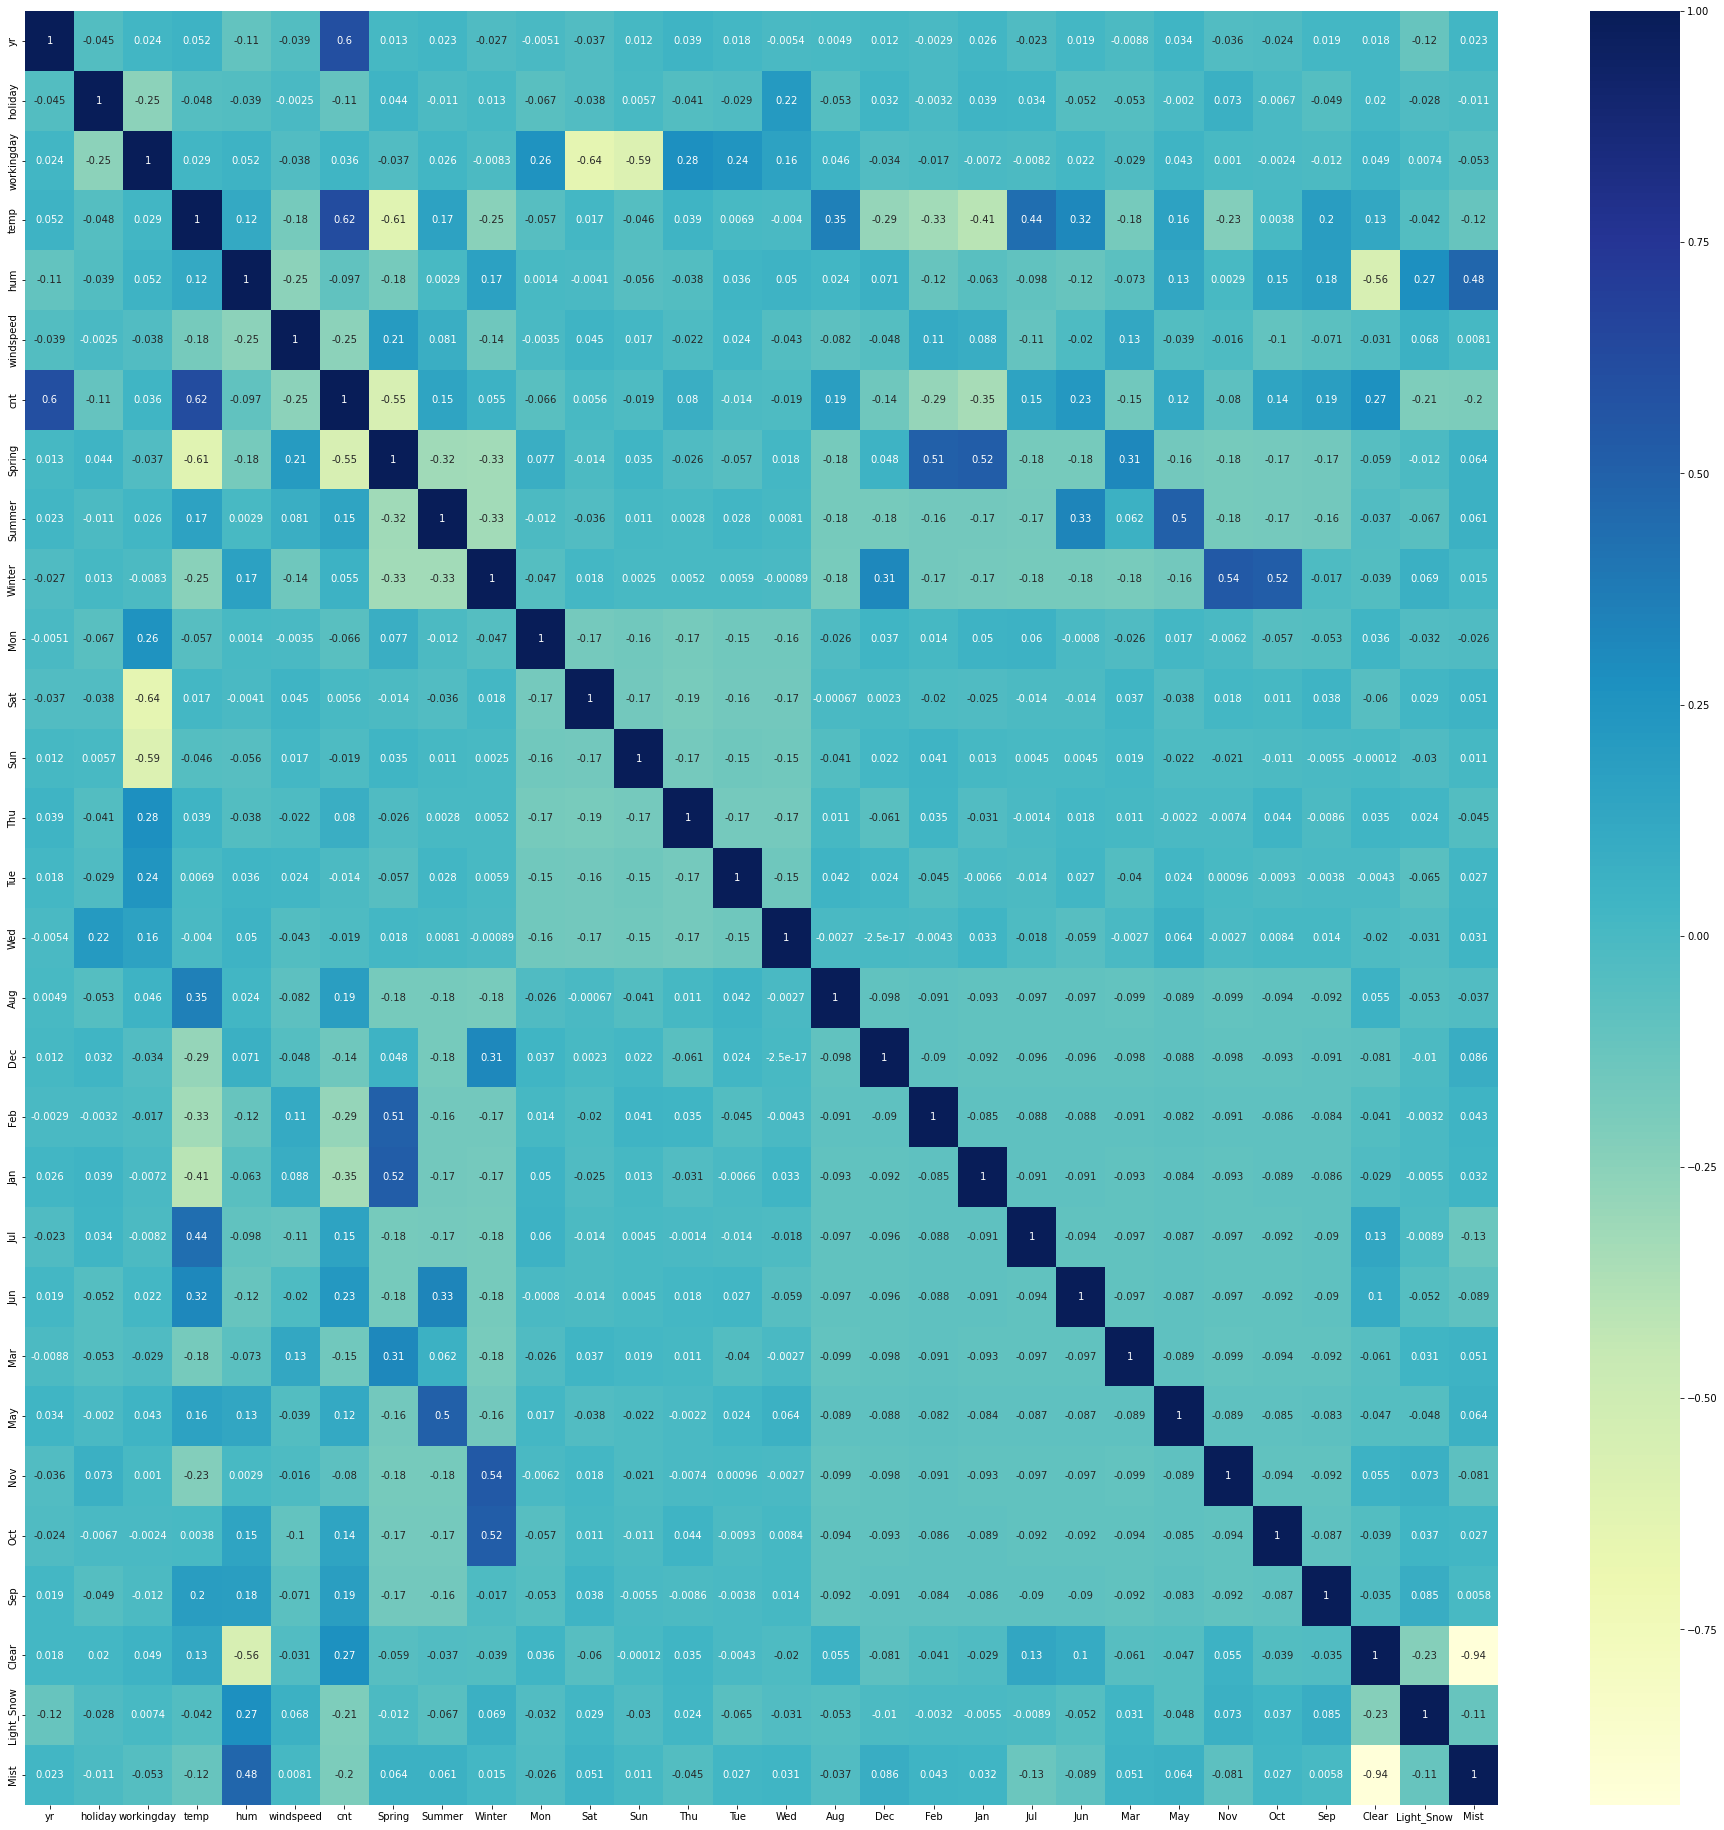

In [47]:
# Getting an idea from the correlation about the state of relationship among various features

plt.figure(figsize=[33,33])  # Increasing the graph size
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu") # Plotting the correlation in the form of heatmap for appealing look
plt.show()

In [48]:
# y_train = cnt
y_train = df_train.pop("cnt")

# X_train = Feature apart from cnt
X_train = df_train

In [49]:
# Importing statsmodel library so that detailed p value and other statistical details can be examined

import statsmodels.api as sm

### Let's apply RFE for the selection of the feature

In [50]:
#Let's import RPE package from sklearn library for auto selection of the best feature for Linear Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()
lm.fit(X_train , y_train)
rfe = RFE(lm , n_features_to_select = 11) # Selecting the top 11 features
rfe = rfe.fit(X_train , y_train) # Fitting the selected features

In [52]:
# Just having a glance at the features and their ranking

list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 18),
 ('Winter', True, 1),
 ('Mon', False, 14),
 ('Sat', False, 9),
 ('Sun', False, 7),
 ('Thu', False, 19),
 ('Tue', False, 6),
 ('Wed', False, 16),
 ('Aug', False, 17),
 ('Dec', True, 1),
 ('Feb', False, 5),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 15),
 ('May', False, 12),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', False, 4),
 ('Clear', False, 2),
 ('Light_Snow', True, 1),
 ('Mist', False, 13)]

In [53]:
# Let's get all the true columns

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jul', 'Nov', 'Light_Snow'],
      dtype='object')

In [54]:
# Columns which are not selected

X_train.columns[~rfe.support_]

Index(['workingday', 'Summer', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug',
       'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct', 'Sep', 'Clear', 'Mist'],
      dtype='object')

In [55]:
# Creating the dataframe with the selected feature

X_train_rfe = X_train[col]
X_train_rfe.head()

yr  holiday      temp       hum  windspeed  Spring  Winter  Dec  Jul  \
373   1        0  0.205644  0.647051   0.213575       1       0    0    0   
673   1        0  0.324018  0.376638   0.597199       0       1    0    0   
206   0        0  0.887856  0.437453   0.496517       0       0    0    1   
103   0        0  0.508849  0.436911   0.246514       0       0    0    0   
329   0        0  0.394627  0.620987   0.128491       0       1    0    0   

     Nov  Light_Snow  
373    0           0  
673    1           0  
206    0           0  
103    0           0  
329    1           0

### Model 1

In [56]:
# Importing for calculating VIF of the feature for checking Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Building the model 

X_train_lm = sm.add_constant(X_train_rfe)

# Create the model and fitting model

lm_1 = sm.OLS(y_train , X_train_lm).fit()

# Params

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     246.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          1.54e-193
Time:                        07:31:46   Log-Likelihood:                 482.72
No. Observations:                 510   AIC:                            -941.4
Df Residuals:                     498   BIC:                            -890.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3372      0.030     11.268      0.000       0.278       0.396
yr             0.2582      0.009     30.083      0.000       0.241       0.275
holiday       -0.0713      0.026     -2.743      0.006      -0.122      -0.020
temp           0.4995      0.033     15.018      0.000       0.434       0.565
hum           -0.2526      0.027     -9.503      0.000      -0.305      -0.200
windspeed     -0.1410      0.021     -6.678      0.000      -0.182      -0.100
Spring        -0.1384      0.016     -8.584      0.000      -0.170      -0.107
Winter         0.1047      0.015      7.005      0.000       0.075       0.134
Dec           -0.0630      0.017     -3.605      0.000      -0.097      -0.029
Jul           -0.0868      0.017     -5.027      0.000      -0.121      -0.053
Nov           -0.0921      0.019     -4.742      0.000      -0.130      -0.054
Light_Snow    -0.1156      0.027     -4.229      0.000      -0.169      -0.062
==============================================================================
Omnibus:                       38.080   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.435
Skew:                          -0.580   Prob(JB):                     4.11e-12
Kurtosis:                       4.060   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Let's try to analyze based on VIF also to check Multicollinearity

vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

Features    VIF
2         temp  11.22
3          hum  10.10
4    windspeed   4.76
6       Winter   2.84
5       Spring   2.23
0           yr   2.01
9          Nov   1.84
7          Dec   1.48
8          Jul   1.45
10  Light_Snow   1.14
1      holiday   1.05

So what here we can see is , we have two features with vif >5 so we will drop it one by one

### Model 2

Even though the VIF of the "temp" is higher I am dropping "hum" because "temp" is showing comparetively strong correlation with "cnt" so I will drop "hum" first and then decide.

In [59]:
# Drop feature hum

X = X_train_rfe.drop(["hum"] , axis=1 )

In [60]:
# Building the model 
X_train_lm = sm.add_constant(X)

# Create the model and fitting model

lm_2 = sm.OLS(y_train , X_train_lm).fit()

# ParamsX_train_2
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.5
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          9.11e-177
Time:                        07:31:46   Log-Likelihood:                 440.22
No. Observations:                 510   AIC:                            -858.4
Df Residuals:                     499   BIC:                            -811.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1987      0.028      7.001      0.000       0.143       0.254
yr             0.2669      0.009     28.814      0.000       0.249       0.285
holiday       -0.0664      0.028     -2.354      0.019      -0.122      -0.011
temp           0.4572      0.036     12.775      0.000       0.387       0.528
windspeed     -0.0915      0.022     -4.120      0.000      -0.135      -0.048
Spring        -0.1392      0.018     -7.951      0.000      -0.174      -0.105
Winter         0.0877      0.016      5.441      0.000       0.056       0.119
Dec           -0.0707      0.019     -3.729      0.000      -0.108      -0.033
Jul           -0.0565      0.018     -3.066      0.002      -0.093      -0.020
Nov           -0.0801      0.021     -3.804      0.000      -0.121      -0.039
Light_Snow    -0.1930      0.028     -6.808      0.000      -0.249      -0.137
==============================================================================
Omnibus:                       51.123   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.054
Skew:                          -0.723   Prob(JB):                     2.26e-16
Kurtosis:                       4.141   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Let's try to analyze based on VIF also to check Multicollinearity

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

Features   VIF
3   windspeed  4.76
2        temp  4.75
5      Winter  2.51
0          yr  2.00
8         Nov  1.84
4      Spring  1.79
6         Dec  1.45
7         Jul  1.36
9  Light_Snow  1.06
1     holiday  1.05

Model 2 also seems to be going well mathematically for now but I decided to go for the next model as with this model difference between R2 on train data and R2_score on test data is exceeding 5%.

### Model 3

In [62]:
# Drop feature windspeed

X = X.drop(["windspeed"] , axis=1 )

# Building the model 
X_train_lm = sm.add_constant(X)

# Create the model and fitting model

lm_3 = sm.OLS(y_train , X_train_lm).fit()

# ParamsX_train_2
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.8
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          2.34e-174
Time:                        07:31:46   Log-Likelihood:                 431.69
No. Observations:                 510   AIC:                            -843.4
Df Residuals:                     500   BIC:                            -801.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1459      0.026      5.672      0.000       0.095       0.196
yr             0.2680      0.009     28.492      0.000       0.250       0.287
holiday       -0.0653      0.029     -2.277      0.023      -0.122      -0.009
temp           0.4727      0.036     13.075      0.000       0.402       0.544
Spring        -0.1408      0.018     -7.917      0.000      -0.176      -0.106
Winter         0.0971      0.016      5.995      0.000       0.065       0.129
Dec           -0.0683      0.019     -3.546      0.000      -0.106      -0.030
Jul           -0.0523      0.019     -2.799      0.005      -0.089      -0.016
Nov           -0.0834      0.021     -3.904      0.000      -0.125      -0.041
Light_Snow    -0.2010      0.029     -6.999      0.000      -0.257      -0.145
==============================================================================
Omnibus:                       55.056   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.018
Skew:                          -0.741   Prob(JB):                     1.55e-18
Kurtosis:                       4.290   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Let's try to analyze based on VIF also to check Multicollinearity

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

Features   VIF
4      Winter  2.50
2        temp  2.43
0          yr  2.00
7         Nov  1.80
5         Dec  1.44
6         Jul  1.32
3      Spring  1.26
1     holiday  1.05
8  Light_Snow  1.05

### Model 4

In [64]:
# Drop feature Jul

X = X.drop(["Jul"] , axis=1 )

# Building the model 
X_train_lm = sm.add_constant(X)

# Create the model and fitting model

lm_4 = sm.OLS(y_train , X_train_lm).fit()

# ParamsX_train_2
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     262.9
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          6.74e-174
Time:                        07:31:46   Log-Likelihood:                 427.72
No. Observations:                 510   AIC:                            -837.4
Df Residuals:                     501   BIC:                            -799.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.025      6.471      0.000       0.113       0.212
yr             0.2696      0.009     28.506      0.000       0.251       0.288
holiday       -0.0691      0.029     -2.397      0.017      -0.126      -0.012
temp           0.4355      0.034     12.866      0.000       0.369       0.502
Spring        -0.1465      0.018     -8.235      0.000      -0.181      -0.112
Winter         0.0995      0.016      6.107      0.000       0.067       0.132
Dec           -0.0731      0.019     -3.787      0.000      -0.111      -0.035
Nov           -0.0888      0.021     -4.144      0.000      -0.131      -0.047
Light_Snow    -0.2020      0.029     -6.986      0.000      -0.259      -0.145
==============================================================================
Omnibus:                       52.641   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.126
Skew:                          -0.734   Prob(JB):                     4.86e-17
Kurtosis:                       4.175   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Let's try to analyze based on VIF also to check Multicollinearity

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

Features   VIF
4      Winter  2.43
0          yr  1.99
2        temp  1.95
6         Nov  1.80
5         Dec  1.43
3      Spring  1.24
7  Light_Snow  1.05
1     holiday  1.04

### Model 5

In [66]:
# Drop feature Nov

X = X.drop(["Nov"] , axis=1 )

# Building the model 
X_train_lm = sm.add_constant(X)

# Create the model and fitting model

lm_5 = sm.OLS(y_train , X_train_lm).fit()

# ParamsX_train_2
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     288.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          1.73e-171
Time:                        07:31:46   Log-Likelihood:                 419.13
No. Observations:                 510   AIC:                            -822.3
Df Residuals:                     502   BIC:                            -788.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1391      0.025      5.586      0.000       0.090       0.188
yr             0.2693      0.010     28.028      0.000       0.250       0.288
holiday       -0.0801      0.029     -2.749      0.006      -0.137      -0.023
temp           0.4694      0.033     14.067      0.000       0.404       0.535
Spring        -0.1357      0.018     -7.592      0.000      -0.171      -0.101
Winter         0.0694      0.015      4.683      0.000       0.040       0.098
Dec           -0.0426      0.018     -2.350      0.019      -0.078      -0.007
Light_Snow    -0.2054      0.029     -6.994      0.000      -0.263      -0.148
==============================================================================
Omnibus:                       50.585   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.884
Skew:                          -0.712   Prob(JB):                     2.46e-16
Kurtosis:                       4.163   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Let's try to analyze based on VIF also to check Multicollinearity

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

Features   VIF
0          yr  1.99
2        temp  1.93
4      Winter  1.46
5         Dec  1.26
3      Spring  1.23
6  Light_Snow  1.05
1     holiday  1.03

### Model 6

In [68]:
# Drop feature Winter

X = X.drop(["Winter"] , axis=1 )

# Building the model 
X_train_lm = sm.add_constant(X)

# Create the model and fitting model

lm_6 = sm.OLS(y_train , X_train_lm).fit()

# ParamsX_train_2
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     319.9
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          4.14e-168
Time:                        07:31:47   Log-Likelihood:                 408.23
No. Observations:                 510   AIC:                            -802.5
Df Residuals:                     503   BIC:                            -772.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.020     10.873      0.000       0.175       0.252
yr             0.2704      0.010     27.588      0.000       0.251       0.290
holiday       -0.0781      0.030     -2.625      0.009      -0.137      -0.020
temp           0.3843      0.029     13.455      0.000       0.328       0.440
Spring        -0.1868      0.014    -12.919      0.000      -0.215      -0.158
Dec           -0.0252      0.018     -1.391      0.165      -0.061       0.010
Light_Snow    -0.1986      0.030     -6.633      0.000      -0.257      -0.140
==============================================================================
Omnibus:                       46.651   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.332
Skew:                          -0.681   Prob(JB):                     1.07e-14
Kurtosis:                       4.083   Cond. No.                         9.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Let's try to analyze based on VIF also to check Multicollinearity

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

Features   VIF
0          yr  1.95
2        temp  1.85
3      Spring  1.18
4         Dec  1.07
1     holiday  1.03
5  Light_Snow  1.03

### Model 7

In [70]:
# Drop feature Dec

X = X.drop(["Dec"] , axis=1 )

# Building the model 
X_train_lm = sm.add_constant(X)

# Create the model and fitting model

lm_7 = sm.OLS(y_train , X_train_lm).fit()

# ParamsX_train_2
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     382.8
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          5.27e-169
Time:                        07:31:47   Log-Likelihood:                 407.25
No. Observations:                 510   AIC:                            -802.5
Df Residuals:                     504   BIC:                            -777.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.018     11.122      0.000       0.167       0.239
yr             0.2699      0.010     27.530      0.000       0.251       0.289
holiday       -0.0791      0.030     -2.656      0.008      -0.138      -0.021
temp           0.3974      0.027     14.710      0.000       0.344       0.450
Spring        -0.1833      0.014    -12.858      0.000      -0.211      -0.155
Light_Snow    -0.1975      0.030     -6.593      0.000      -0.256      -0.139
==============================================================================
Omnibus:                       46.985   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.257
Skew:                          -0.681   Prob(JB):                     6.76e-15
Kurtosis:                       4.102   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Let's try to analyze based on VIF also to check Multicollinearity

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

Features   VIF
0          yr  1.93
2        temp  1.84
3      Spring  1.16
1     holiday  1.03
4  Light_Snow  1.03

Mathematically everything seems to be under Control

## Residual Analysis of the train data

In [72]:
y_train_pred = lm_7.predict(X_train_lm)

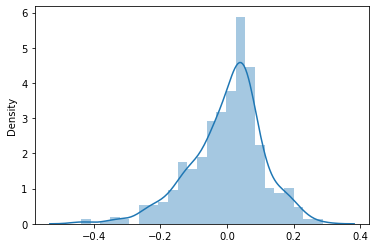

In [73]:
# Ploting the histogram of the error term

sns.distplot(y_train - y_train_pred)
plt.show()

#### Conclusion
- Distibution is approximately normal and centered around zero, so we can say that till now we are on the right way

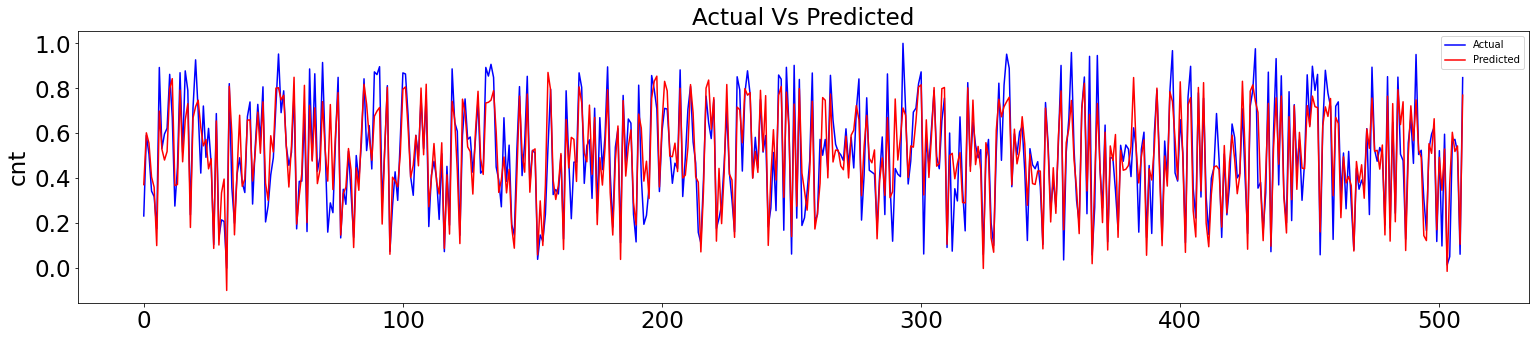

In [74]:
#Actual vs Predicted
x = [i for i in range(0,len(X_train_lm),1)]
fig = plt.figure(figsize = [26,5])
plt.plot(x,y_train,c="b" ,label="Actual")
plt.plot(x,y_train_pred,c="r", label="Predicted")
plt.title('Actual Vs Predicted', fontsize=23)  
plt.ylabel('cnt', fontsize=23) 
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.legend()
plt.show()

The actual and Predicted patterns seems to overlap which is a good sign.

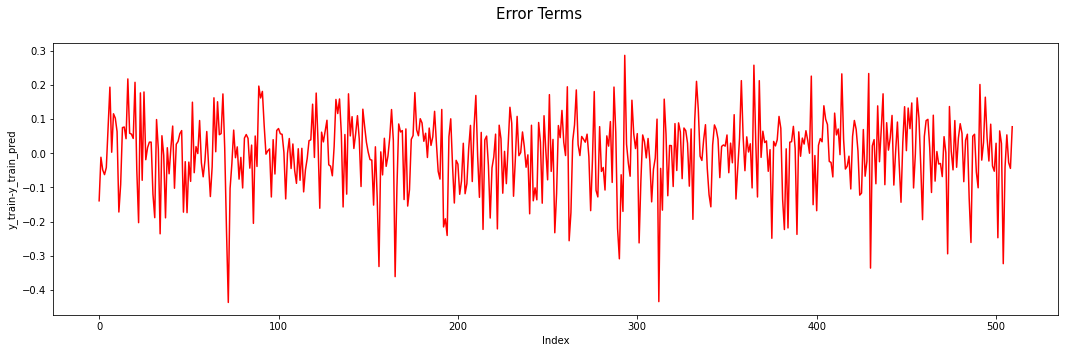

In [75]:
# Error term check for independence with each other

x = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=[18,5])
plt.plot(x,y_train-y_train_pred,c="r")
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Assumption check
- There is no relation between residual and the other variable this mean it is independent of error

#### Homoscedasticity

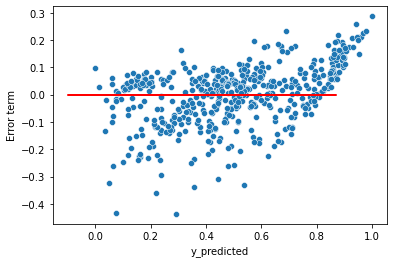

In [76]:
sns.scatterplot(y_train,y_train - y_train_pred)
plt.plot(y_train_pred,y_train - y_train, c="r")
plt.xlabel('y_predicted')
plt.ylabel('Error term')
plt.show()

No any pattern is seen from the above plot thus the assumption is followed

## Prediction and Evaluation of the test data

### Preprocessing steps

In [77]:
# Just having a look at the test data

df_test.head()

yr  holiday  workingday       temp      hum  windspeed     cnt  Spring  \
580   1        0           0  32.526653  61.3333  17.249686  6824.0       0   
199   0        0           1  31.843347  65.0417   8.750200  4541.0       0   
725   1        0           1  10.420847  65.2917  23.458911  2114.0       1   
144   0        0           1  27.094153  69.6250  10.333611  4978.0       0   
477   1        0           1  13.188347  76.6667  20.334232  3214.0       0   

     Summer  Winter  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  Clear  \
580       0       0  ...    0    0    0    0    0    0    0      1   
199       0       0  ...    1    0    0    0    0    0    0      1   
725       0       0  ...    0    0    0    0    0    0    0      0   
144       1       0  ...    0    0    0    1    0    0    0      1   
477       1       0  ...    0    0    0    0    0    0    0      0   

     Light_Snow  Mist  
580           0     0  
199           0     0  
725           0     1  
144           0     0  
477           0     1  

[5 rows x 30 columns]

In [78]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Clear', 'Light_Snow', 'Mist'],
      dtype='object')

In [79]:
# Transforming the data with respect to Scaling

# List of columns to be scaled
con_var = ["temp","hum","windspeed","cnt"]

df_test[con_var] = scaler.transform(df_test[con_var])
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  Spring  \
580   1        0           0  0.914852  0.531935   0.656192  0.784942       0   
199   0        0           1  0.894086  0.580262   0.302066  0.501305       0   
725   1        0           1  0.243025  0.583520   0.914897  0.199776       1   
144   0        0           1  0.749751  0.639992   0.368038  0.555597       0   
477   1        0           1  0.327133  0.731759   0.784708  0.336439       0   

     Summer  Winter  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  Clear  \
580       0       0  ...    0    0    0    0    0    0    0      1   
199       0       0  ...    1    0    0    0    0    0    0      1   
725       0       0  ...    0    0    0    0    0    0    0      0   
144       1       0  ...    0    0    0    1    0    0    0      1   
477       1       0  ...    0    0    0    0    0    0    0      0   

     Light_Snow  Mist  
580           0     0  
199           0     0  
725           0     1  
144           0     0  
477           0     1  

[5 rows x 30 columns]

In [80]:
# Mathematical Sanity check

df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.518182    0.031818    0.681818    0.535496    0.559451    0.497469   
std      0.500809    0.175916    0.466833    0.229392    0.194884    0.199967   
min      0.000000    0.000000    0.000000    0.046591    0.000000    0.064251   
25%      0.000000    0.000000    0.000000    0.340113    0.392656    0.347213   
50%      1.000000    0.000000    1.000000    0.552979    0.579448    0.476541   
75%      1.000000    0.000000    1.000000    0.740406    0.698772    0.602391   
max      1.000000    1.000000    1.000000    0.965734    0.997285    1.000000   

              cnt   Spring      Summer      Winter  ...         Jul  \
count  220.000000  220.000  220.000000  220.000000  ...  220.000000   
mean     0.488040    0.250    0.277273    0.227273  ...    0.081818   
std      0.244976    0.434    0.448673    0.420026  ...    0.274713   
min     -0.060132    0.000    0.000000    0.000000  ...    0.000000   
25%      0.337744    0.000    0.000000    0.000000  ...    0.000000   
50%      0.503851    0.000    0.000000    0.000000  ...    0.000000   
75%      0.660827    0.250    1.000000    0.000000  ...    0.000000   
max      1.019754    1.000    1.000000    1.000000  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.072727    0.072727    0.109091    0.063636    0.090909    0.090909   
std      0.260281    0.260281    0.312464    0.244661    0.288135    0.288135   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            Clear  Light_Snow        Mist  
count  220.000000  220.000000  220.000000  
mean     0.581818    0.031818    0.386364  
std      0.494385    0.175916    0.488026  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000  
75%      1.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [81]:
# X_test = Feature apart from cnt
# y_test = cnt

y_test = df_test.pop("cnt")
X_test = df_test

In [82]:
# Adding the features which were used to train model

X_test = X_test[list(X.columns)]
X_test.head()

yr  holiday      temp  Spring  Light_Snow
580   1        0  0.914852       0           0
199   0        0  0.894086       0           0
725   1        0  0.243025       1           0
144   0        0  0.749751       0           0
477   1        0  0.327133       0           0

In [83]:
# Add Constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  yr  holiday      temp  Spring  Light_Snow
580    1.0   1        0  0.914852       0           0
199    1.0   0        0  0.894086       0           0
725    1.0   1        0  0.243025       1           0
144    1.0   0        0  0.749751       0           0
477    1.0   1        0  0.327133       0           0

In [84]:
# Predict

y_test_pred = lm_7.predict(X_test_sm)

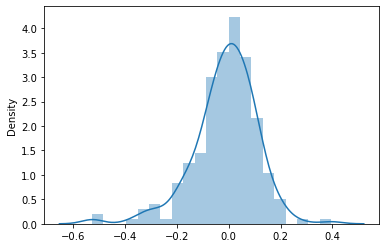

In [85]:
# Plotting the histogram of the error term

sns.distplot(y_test - y_test_pred)
plt.show()

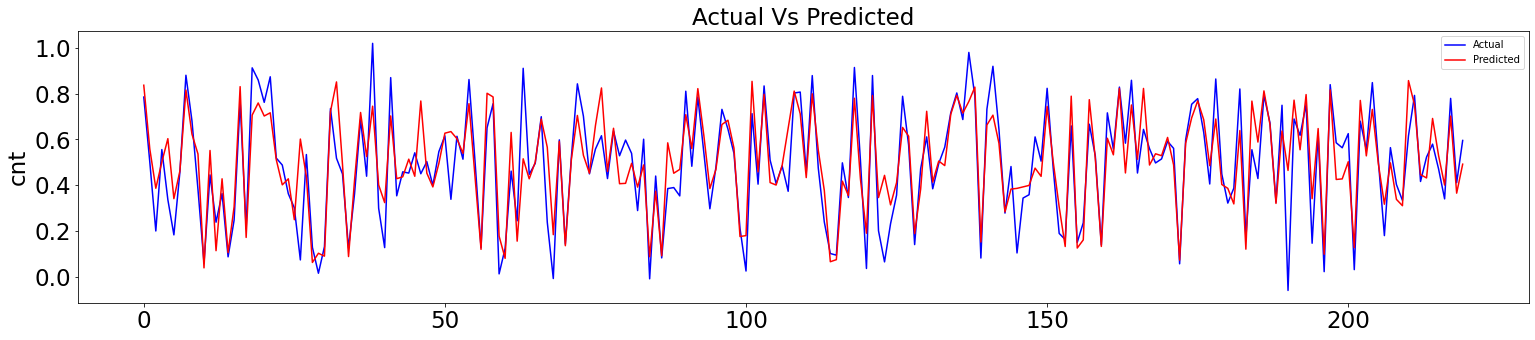

In [86]:
#Actual vs Predicted
x = [i for i in range(0,len(X_test),1)]
fig = plt.figure(figsize = [26,5])
plt.plot(x,y_test,c="b" ,label="Actual")
plt.plot(x,y_test_pred,c="r", label="Predicted")
plt.title('Actual Vs Predicted', fontsize=23)  
plt.ylabel('cnt', fontsize=23) 
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import r2_score

In [88]:
# Evaluate
r2_score(y_true = y_test , y_pred = y_test_pred)

0.7438779966748099

In [89]:
100*(0.789-0.7438779966748099)

4.512200332519011

#### Conclusion
- With year the demands seems to rise so we should be ready with more bikes once pandemic is over and the rushes are usual.
- The demand of bikes are more in summer(high temp) when the weather is clear and tends to fall in light snow or say harse         weather,one of the reason for this may be blockage of the connectivity due to snow may be.
